In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_1')

In [3]:
# Parameters' values
C1_value=100*1e-6     #(100 uF)
C2_value=150*1e-6     #(150 uF)
R_value=100*1e3       #(100 k)

In [4]:
E1=bgt.new("C", value=C1_value)
E2=bgt.new("C", value=C2_value)
R=bgt.new("R", value=R_value)

In [5]:
zero_junc_1=bgt.new("0")
zero_junc_2=bgt.new("0")
one_junc=bgt.new("1")

In [6]:
bgt.add(model,E1,E2,R,zero_junc_1,zero_junc_2,one_junc)

In [7]:
bgt.connect(E1,zero_junc_1)
bgt.connect(zero_junc_1,one_junc)
bgt.connect(one_junc,R)
bgt.connect(one_junc,zero_junc_2)
bgt.connect(zero_junc_2,E2)

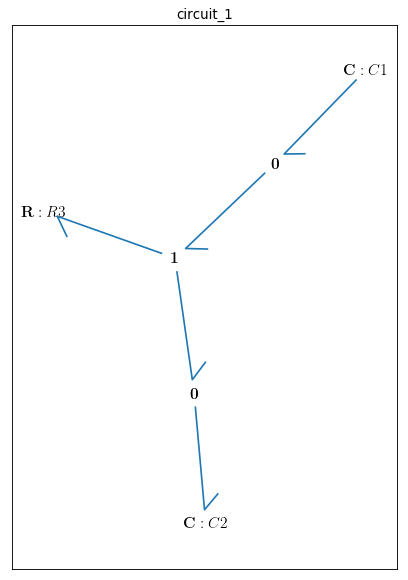

In [19]:
bgt.draw(model)

In [9]:
timespan=[0,100]

In [10]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0')}

In [11]:
x0={"x_0":1, "x_1":0}

In [12]:
model.constitutive_relations

[dx_0 + x_0/10 - x_1/15, dx_1 - x_0/10 + x_1/15]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

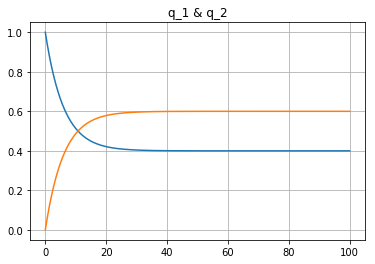

In [14]:
import matplotlib.pyplot as plt
fig=plt.plot(t,x)
plt.title("q_1 & q_2")
plt.grid()

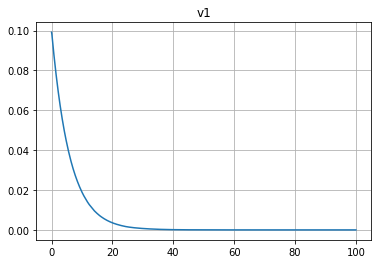

In [15]:
# dq_1/dt = v1 (current)
import numpy as np
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v1=slope
fig=plt.plot(t,v1)
plt.title("v1")
plt.grid()

In [16]:
u3=R._params['r']*v1
u1=x[:,0]/E1._params['C']
u2=x[:,1]/E2._params['C']

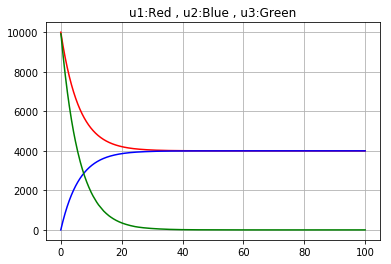

In [17]:
for u, c in [(u1,'r'), (u2,'b'), (u3,'g')]:
    fig=plt.plot(t,u,c)
    plt.title("u1:Red , u2:Blue , u3:Green")
    plt.grid()
